In [20]:
import pandas as pd

tweets = pd.read_csv('datasets_695933_1217821_stock_data.csv')

tweets['id'] = range(1, len(tweets) + 1)
del tweets['Sentiment']
pd.set_option('display.max_colwidth', -1)

C:\Users\kylem\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [21]:
tweets.head()

,Text,id
0,"Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method 1 or method 2, see prev posts",1
1,user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year. AWESOME.,2
2,user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service,3
3,MNTA Over 12.00,4
4,OI Over 21.37,5


In [22]:
#takes a sentence, splits it and counts the words
def word_count(str):
    counts = dict()
    words = str.split()
    
    for word in words:
        if word in counts:
            counts[word] +=1
        else:
            counts[word] = 1
            
    return counts 

# takes an array of tweets and gives me counts
def tweet_counts(tweet_array, threshold=10):
    unique, counts = np.unique(np.array(tweet), return_counts=True)
    count_dict = dict(zip(unique, counts))
    
    return [{k,v} for k, v in count_dict.items() if v > threshold]


In [23]:
stopwords = ['i',
'me',
'my',
'myself',
'we',
'our',
'ours',
'ourselves',
'you',
'your',
'yours',
'yourself',
'yourselves',
'he',
'him',
'his',
'himself',
'she',
'her',
'hers',
'herself',
'it',
'its',
'itself',
'they',
'them',
'their',
'theirs',
'themselves',
'what',
'which',
'who',
'whom',
'this',
'that',
'these',
'those',
'am',
'is',
'are',
'was',
'were',
'be',
'been',
'being',
'have',
'has',
'had',
'having',
'do',
'does',
'did',
'doing',
'a',
'an',
'the',
'and',
'but',
'if',
'or',
'because',
'as',
'until',
'while',
'of',
'at',
'by',
'for',
'with',
'about',
'against',
'between',
'into',
'through',
'during',
'before',
'after',
'above',
'below',
'to',
'from',
'up',
'down',
'in',
'out',
'on',
'off',
'over',
'under',
'again',
'further',
'then',
'once',
'here',
'there',
'when',
'where',
'why',
'how',
'all',
'any',
'both',
'each',
'few',
'more',
'most',
'other',
'some',
'such',
'no',
'nor',
'not',
'only',
'own',
'same',
'so',
'than',
'too',
'very',
's',
't',
'can',
'will',
'just',
'don',
'should',
'now','', '-', 'I', 'user:', 'user', '&', 'like', 'volume', 'day', 'The', 'today', 'stock', 
'still', 'move', 'new', 'To', 'Triangle', 'back', 'see', 'ong', 'time', 'next', 'looking', 'Nifty', 
'In']

sw_df = pd.DataFrame(stopwords, columns=['stopword'])

In [24]:
from collections import Counter

no_sw = tweets.Text.apply(lambda word: [word for word in word.split(' ') if word not in stopwords])

corpus = []
for ea in no_sw:
    corpus += ea
wordDict = Counter(corpus)

[ (k, v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True) ][:20]

[('AAP', 884),
 ('short', 293),
 ('long', 225),
 ('BAC', 202),
 ('GOOG', 191),
 ('good', 179),
 ('nice', 149),
 ('buy', 143),
 ('watch', 136),
 ('stop', 122),
 ('one', 122),
 ('break', 119),
 ('looks', 114),
 ('last', 114),
 ('higher', 109),
 ('could', 106),
 ('NFX', 105),
 ('close', 103),
 ('going', 102),
 ('RT', 100)]

# Sentiment Analysis

In [25]:
from textblob import TextBlob

tweets['sentiment'] = tweets.Text.apply(lambda text: TextBlob(text).sentiment[0])

In [26]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [27]:
pysqldf("SELECT * FROM tweets").head()

,Text,id,sentiment
0,"Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ trade method 1 or method 2, see prev posts",1,0.0
1,user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year. AWESOME.,2,1.0
2,user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service,3,-0.3
3,MNTA Over 12.00,4,0.0
4,OI Over 21.37,5,0.0


In [28]:
pysqldf("SELECT * FROM tweets where sentiment >= 0.0 order by sentiment DESC")

,Text,id,sentiment
0,user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year. AWESOME.,2,1.0
1,AAP VOME today is impressive. At this rate and well probably get to 30M shares traded today.,31,1.0
2,user: AMZN it's time for this bird to fly south!,331,1.0
3,NS Perfect day for a reversal candle on the dailies.,423,1.0
4,"user The day of the MA IPO I tripled my position at 42 (IPO priced at 39) never touched it since, probably my best stock move ever...",459,1.0
...,...,...,...
4732,"Goldman Sachs tells investors to go defensive amid share market slump, pick large-caps to beat virus\n#sensex… https://t.co/QCVjebyKle",5785,0.0
4733,"#TCS #share price jumps 9% on no #layoffs, #dividend announcements; should you buy, sell or hold the stock https://t.co/ijDFJRDLOl",5786,0.0
4734,"Industry body CII said #discoms are likely to suffer a net revenue loss of around Rs 30,000 crore\n\nhttps://t.co/8c6YJYJajL",5787,0.0
4735,"#Gold prices slip below Rs 46,000 as #investors book profits amid #coronavirus-led #recession fears https://t.co/fSylAJrUqv",5788,0.0


In [29]:
pysqldf("SELECT * FROM tweets where sentiment < 0.0 order by sentiment")

,Text,id,sentiment
0,ltra base? TEK #ltratech Step it up! #Stepper,997,-1.000000e+00
1,AAP should buy a gold miner at this point and just drill the earth with their cash hoard. 'Be evil' campaign...mix it up,1348,-1.000000e+00
2,AEE who says utilities are boring,2738,-1.000000e+00
3,NFX INSANE,4312,-1.000000e+00
4,The loss will help push SoftBank into some of the worst results in the companyâ€™s 39-year history https://t.co/XbYyDRNm1W,5108,-1.000000e+00
...,...,...,...
1049,FFIV - Worked off overbought levels quickly after testing the top side of this long term base. Gap fill at 99.05. Ascending triangle.,2597,-4.166667e-03
1050,F coiling so hard right now,721,-2.976190e-03
1051,"APO 20 green days in a row so far, but no new high yet today.",618,-2.045455e-03
1052,user Time and time again revenues slow down for hot stocks like lulu and they bend over to hide the real cause.,4799,-1.388889e-03


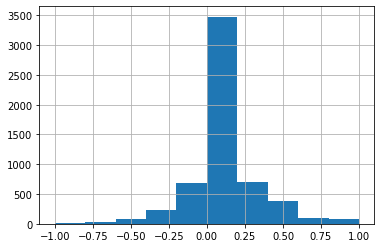

In [30]:
tweets.sentiment.hist()

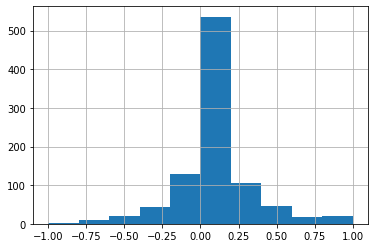

In [37]:
AAP = pysqldf("SELECT * FROM tweets where Text like '%AAP%'")
AAP.sentiment.hist()

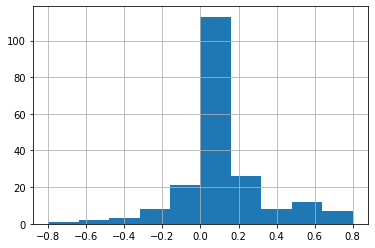

In [38]:
GOOG = pysqldf("SELECT * FROM tweets where Text like '%GOOG%'")
GOOG.sentiment.hist()

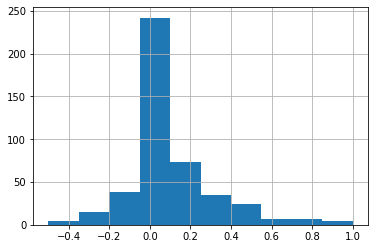

In [39]:
BAC = pysqldf("SELECT * FROM tweets where Text like '%BAC%'")
BAC.sentiment.hist()

In [55]:
all_tweets = pysqldf("SELECT * FROM tweets")
long = pysqldf("SELECT * FROM tweets where Text like '%long%'")
short = pysqldf("SELECT * FROM tweets where Text like '%short%'")

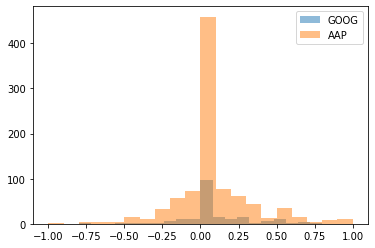

In [54]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(GOOG.sentiment, bins=20, label='GOOG', alpha=0.5)
plt.hist(AAP.sentiment, bins=20, label='AAP', alpha=0.5)
plt.legend(loc='best')
plt.show()

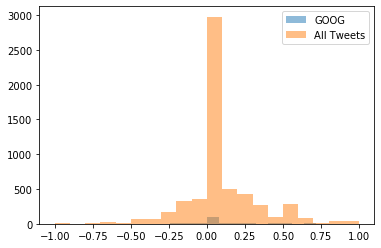

In [57]:
plt.hist(GOOG.sentiment, bins=20, label='GOOG', alpha=0.5)
plt.hist(all_tweets.sentiment, bins=20, label='All Tweets', alpha=0.5)
plt.legend(loc='best')
plt.show()

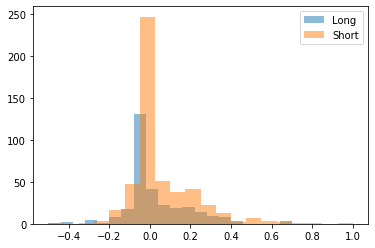

In [59]:
plt.hist(long.sentiment, bins=20, label='Long', alpha=0.5)
plt.hist(short.sentiment, bins=20, label='Short', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [66]:
means = [GOOG.sentiment.mean(),
all_tweets.sentiment.mean(),
AAP.sentiment.mean(),
long.sentiment.mean(),
short.sentiment.mean()]
means

[0.085825483572996,
 0.07796707712255951,
 0.06547349718046587,
 0.02590601587836661,
 0.061150542478355]